# Nitrogen

Use conda environment python3

## Load libraries

In [1]:
import netcdf_tools
import numpy as np
import pandas as pd

## Select year

In [2]:
nbyr=10
years=range(1,nbyr+1)
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)

last_year=np.arange(365*(nbyr-1)+0,365*(nbyr-1)+365)
array1d_iT1y_iT=last_year

locs=list()
xticklabels=range(5,nbyr+1,5)
for year in xticklabels:
    loc=1+365*(year-1)
    locs.append(loc)

## Read outputs

RF is the r coordinate of cell intrface (in m)

In [3]:
gridfile='grid.t001.nc';
RF=netcdf_tools.read_netcdf(gridfile,'RF')

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [4]:
drF=netcdf_tools.read_netcdf(gridfile,'drF')

In [5]:
# 80 characters
#xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxx xxxxxxxxl

In [6]:
gudfile='car.0000000000.t001.nc';

# NH4; mmol N m^-3
array2d_idepth_iT_NH4\
=netcdf_tools.read_netcdf(gudfile, 'TRAC02').squeeze().transpose()

# NO2; mmol N m^-3
array2d_idepth_iT_NO2\
=netcdf_tools.read_netcdf(gudfile, 'TRAC03').squeeze().transpose()

# NO3; mmol N m^-3
array2d_idepth_iT_NO3\
=netcdf_tools.read_netcdf(gudfile, 'TRAC04').squeeze().transpose()

# DON; mmol N m^-3
array2d_idepth_iT_DON\
=netcdf_tools.read_netcdf(gudfile, 'TRAC09').squeeze().transpose()

# PON; mmol N m^-3
array2d_idepth_iT_PON\
=netcdf_tools.read_netcdf(gudfile, 'TRAC13').squeeze().transpose()

# non diazo phyto + zoo biomass; mmol C m^-3
array2d_idepth_iT_nondiazo\
=netcdf_tools.read_netcdf(gudfile, 'TRAC21').squeeze().transpose()

array2d_idepth_iT_nondiazo[:,:]=0
for itracer in np.arange(21,30).tolist()+np.arange(35,70).tolist():
    name=f'TRAC{itracer:02}'
#     print(name)

    # non diazo phyto + zoo biomass; mmol C m^-3
    array2d_depth_iT_onenondiazotracer\
    =netcdf_tools.read_netcdf(gudfile, name).squeeze().transpose()
    
    array2d_idepth_iT_nondiazo\
    =array2d_idepth_iT_nondiazo+array2d_depth_iT_onenondiazotracer

# diazo phyto + zoo biomass; mmol C m^-3
array2d_idepth_iT_diazo\
=netcdf_tools.read_netcdf(gudfile, 'TRAC21').squeeze().transpose()

array2d_idepth_iT_diazo[:,:]=0
for itracer in range(30,35):
    name=f'TRAC{itracer:02}'
#     print(name)

    # diazo phyto + zoo biomass; mmol C m^-3
    array2d_depth_iT_onediazotracer\
    =netcdf_tools.read_netcdf(gudfile, name).squeeze().transpose()
    
    array2d_idepth_iT_diazo\
    =array2d_idepth_iT_diazo+array2d_depth_iT_onediazotracer
    
R_NC_nondiazo=16/120 # See data.gud
R_NC_diazo   =40/120 # See data.gud

# biomass; mmol N m^-3
array2d_idepth_iT_biomass\
=array2d_idepth_iT_nondiazo*R_NC_nondiazo+array2d_idepth_iT_diazo*R_NC_diazo

# total N; mmol N m^-3
array2d_idepth_iT_N\
=array2d_idepth_iT_NH4+array2d_idepth_iT_NO2+array2d_idepth_iT_NO3\
+array2d_idepth_iT_DON+array2d_idepth_iT_PON+array2d_idepth_iT_biomass

# Prepare plots of $NH_4$, $NO_2$, $NO_3$ and $NH_4$+$NO_2$+$NO_3$+$DON$+$PON$+N in phyto+N in zoo

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
# adapted from
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# answer of Pedro M Duarte
SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 28

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the y tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Vertical integration of nitrogen

In [9]:
import vstats

In [10]:
array1d_iT_N0to354  =vstats.vintegrate(array2d_idepth_iT_N, drF,  0, 73)
array1d_iT_N354to360=vstats.vintegrate(array2d_idepth_iT_N, drF, 73, 74)
array1d_iT_N0to360  =vstats.vintegrate(array2d_idepth_iT_N, drF,  0, 74)
# array1d_iT_N0to360  =vstats.vintegrate(array2d_idepth_iT_N, drF,  0, 18)

# Vertical integration of nitrate

In [11]:
array1d_iT_nitrate0to100=vstats.vint(
    array2d_idepth_iT_tracer=array2d_idepth_iT_NO3,
    array1d_idepth_delR=drF,
    depth_end=-100)

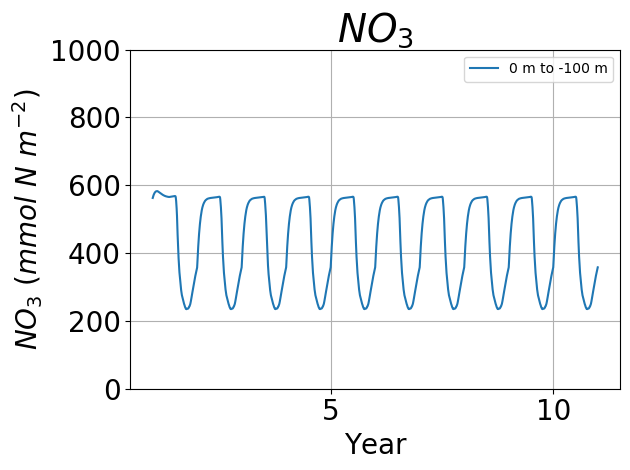

In [12]:
plt.figure(figsize=(6.4,4.8))
plt.plot(array1d_iT_iTforplot,
         array1d_iT_nitrate0to100,
         label='0 m to -100 m')
# plt.legend(loc='lower right')
plt.title('$NO_3$')
plt.xlabel('Year')
plt.ylim(0,1000)
plt.ylabel('$NO_{3}\ (mmol\ N\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.n.vintNO3.png')

# Annual drift of $NO_3$

In [13]:
nbdepth=RF.size-1
array2d_idepth_iyr2tolast_deltaNO3=np.zeros((nbdepth,nbyr-1))
for iyr in range(2,nbyr+1):
    iTcurrent=365*(iyr-1)+364
    array1d_idepth_NO3current=array2d_idepth_iT_NO3[:,iTcurrent]
    iTprevious=365*(iyr-2)+364
    array1d_idepth_NO3previous=array2d_idepth_iT_NO3[:,iTprevious]
    array1d_idepth_deltaNO3=array1d_idepth_NO3current-array1d_idepth_NO3previous
    array2d_idepth_iyr2tolast_deltaNO3[:,iyr-2]=array1d_idepth_deltaNO3
array1d_iyr_yr=np.arange(1,nbyr+1)

# All plots on the same figure

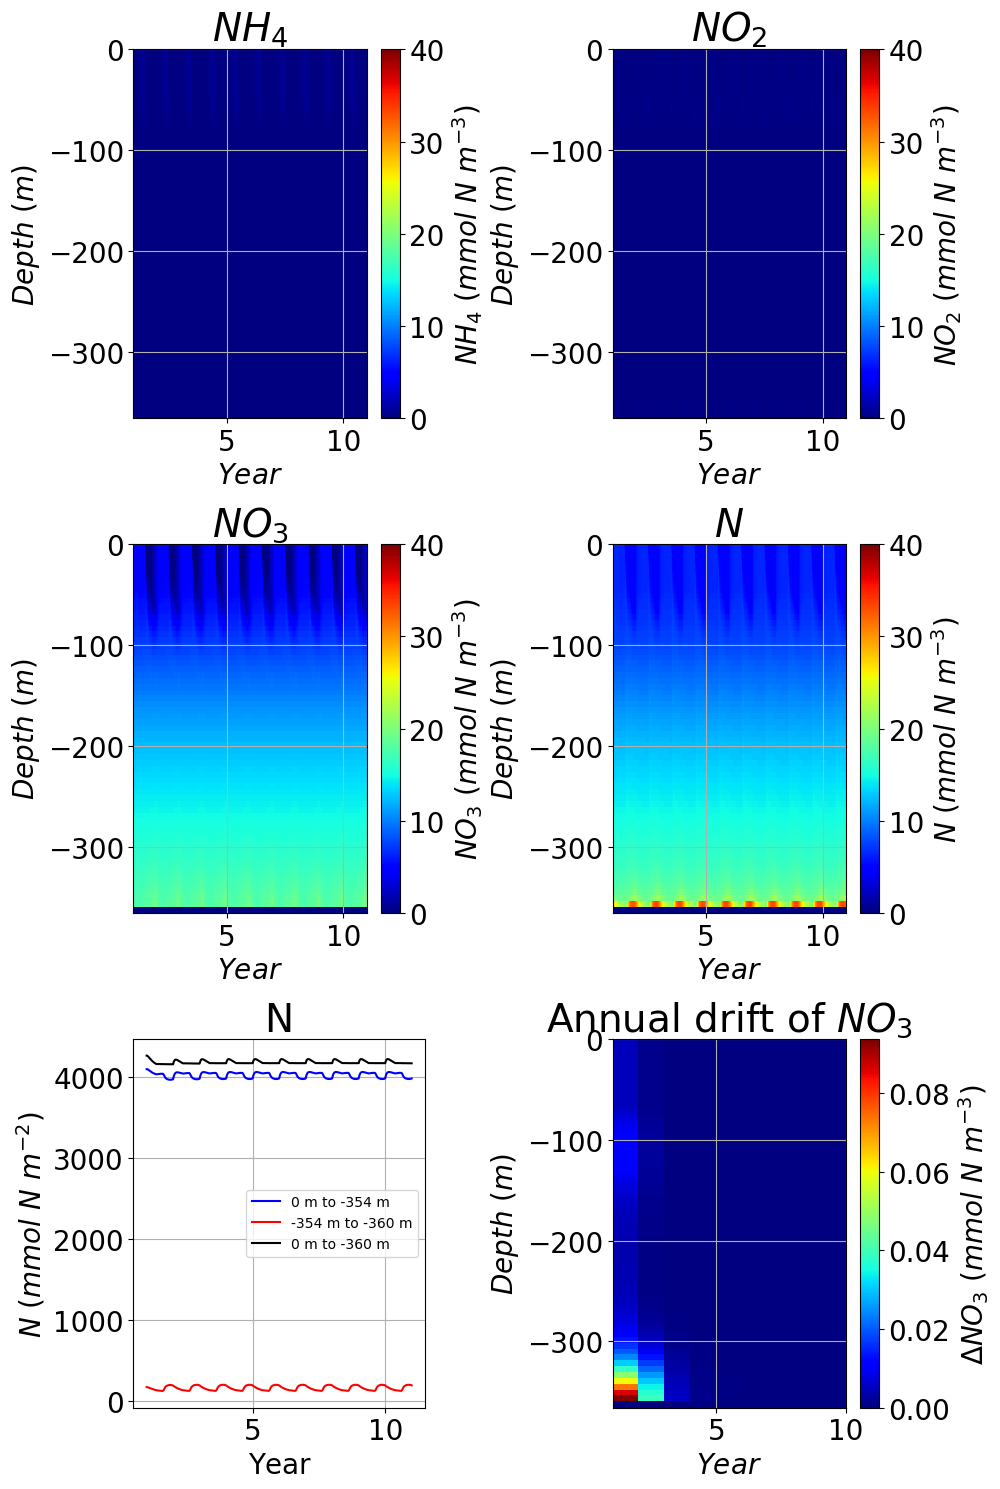

In [14]:
plt.figure(figsize=(10,15))

plt.subplot2grid(shape=(3,2), loc=(0,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NH4,
               cmap='jet',
               vmin=0,
               vmax=40
              )
plt.title('$NH_4$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NH_4\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(0,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NO2,
               cmap='jet',
               vmin=0,
               vmax=40
              )
plt.title('$NO_2$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NO_2\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NO3,
               cmap='jet',
               vmin=0,
               vmax=40
              )
plt.title('$NO_3$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NO_3\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_N,
               cmap='jet',
               vmin=0,
               vmax=40
              )
plt.title('$N$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$N\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(2,0))
plt.plot(array1d_iT_iTforplot,array1d_iT_N0to354,  color='blue', linestyle='-',
         label='0 m to -354 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_N354to360,color='red',  linestyle='-',
         label='-354 m to -360 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_N0to360,  color='black',linestyle='-',
         label='0 m to -360 m')
plt.legend(loc='lower right')
plt.title('N')
plt.xlabel('Year')
plt.ylabel('$N\ (mmol\ N\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()

plt.subplot2grid(shape=(3,2), loc=(2,1))
plt.pcolormesh(array1d_iyr_yr, RF,
               array2d_idepth_iyr2tolast_deltaNO3,
               cmap='jet')
plt.title('Annual drift of $NO_3$')
plt.xlabel('$Year$')
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$\Delta NO_3\ (mmol\ N\ m^{-3})$')

plt.tight_layout()

plt.savefig('car.0000000000.t001.allyears.n.largecbar.png')

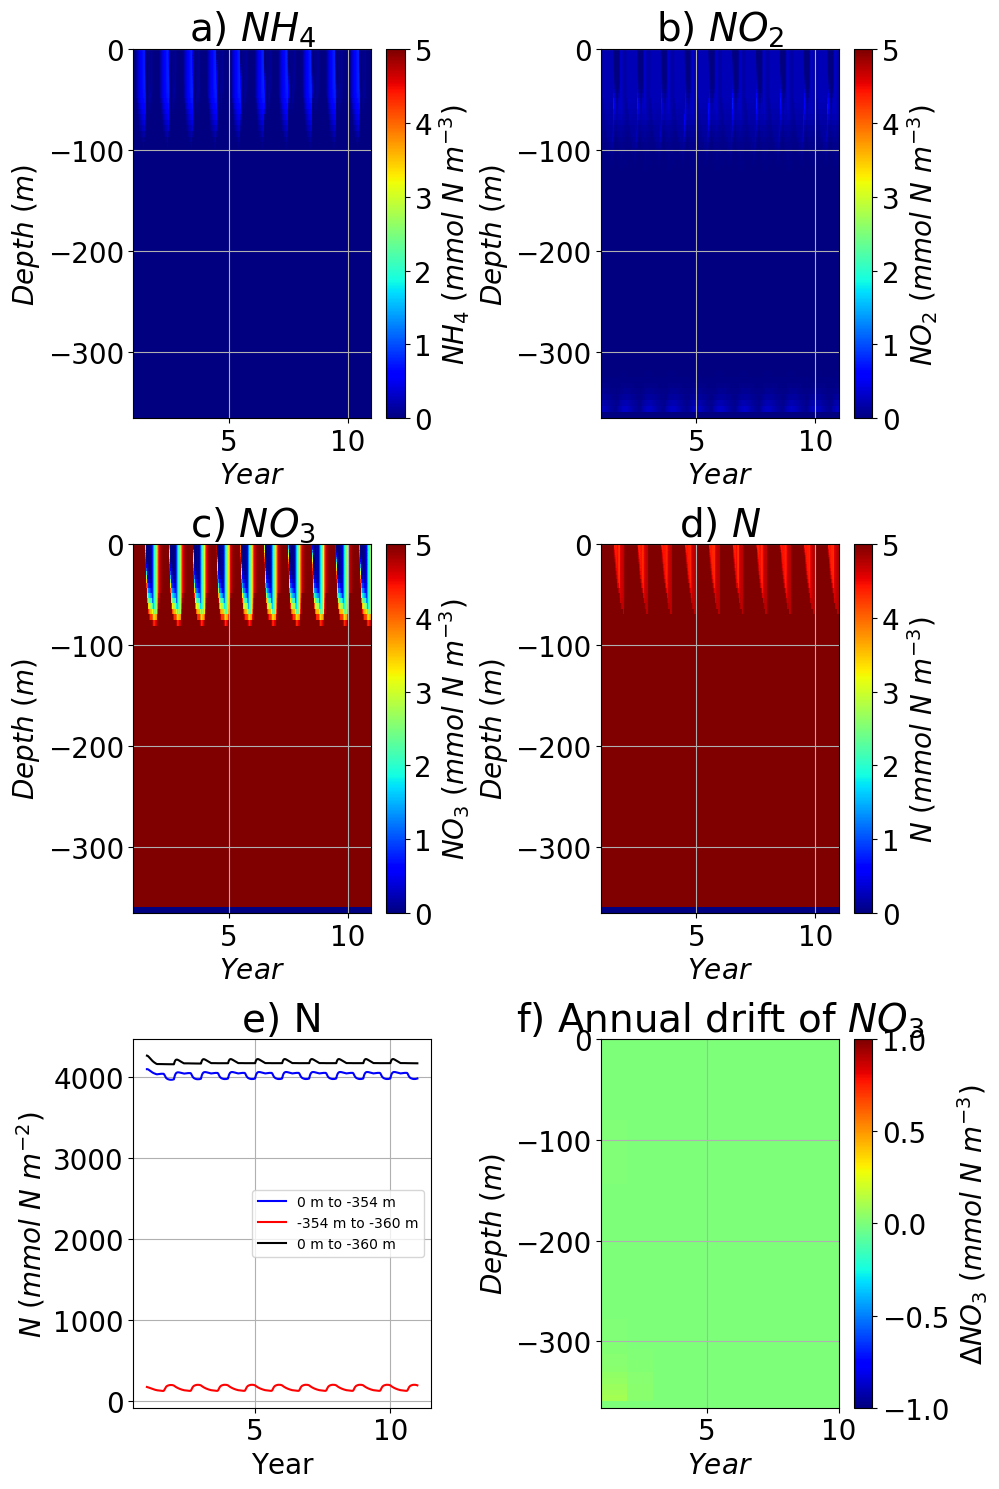

In [15]:
plt.figure(figsize=(10,15))

plt.subplot2grid(shape=(3,2), loc=(0,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NH4,
               cmap='jet',
               vmin=0,
               vmax=5
              )
plt.title('a) $NH_4$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NH_4\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(0,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NO2,
               cmap='jet',
               vmin=0,
               vmax=5
              )
plt.title('b) $NO_2$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NO_2\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NO3,
               cmap='jet',
               vmin=0,
               vmax=5
              )
plt.title('c) $NO_3$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NO_3\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_N,
               cmap='jet',
               vmin=0,
               vmax=5
              )
plt.title('d) $N$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$N\ (mmol\ N\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(2,0))
plt.plot(array1d_iT_iTforplot,array1d_iT_N0to354,  color='blue', linestyle='-',
         label='0 m to -354 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_N354to360,color='red',  linestyle='-',
         label='-354 m to -360 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_N0to360,  color='black',linestyle='-',
         label='0 m to -360 m')
plt.legend(loc='lower right')
plt.title('e) N')
plt.xlabel('Year')
plt.ylabel('$N\ (mmol\ N\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()

plt.subplot2grid(shape=(3,2), loc=(2,1))
plt.pcolormesh(array1d_iyr_yr, RF,
               array2d_idepth_iyr2tolast_deltaNO3,
               cmap='jet',
               vmin=-1,
               vmax=1
              )
plt.title('f) Annual drift of $NO_3$')
plt.xlabel('$Year$')
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$\Delta NO_3\ (mmol\ N\ m^{-3})$')

plt.tight_layout()

plt.savefig('car.0000000000.t001.allyears.n.smallcbar.png')

# Conclusion

**Is nitrogen at equilibrium?**

Yes. There is no diazotrophy even if diazotrophs are present in the configuration.

**Is there a drift of $NO_3$?**

$NO_3$ is in steady-state by year 5.

# Generation of individual plots

## Drift of $NO_3$

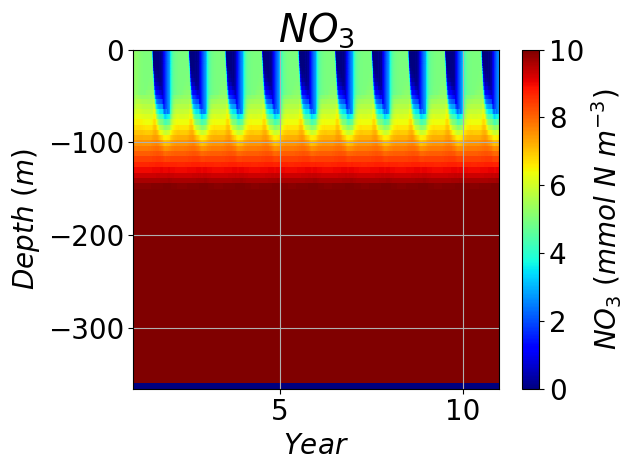

In [16]:
plt.figure(figsize=(6.4,4.8))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_NO3,
               cmap='jet',
               vmin=0,
               vmax=10
              )
plt.title('$NO_3$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$NO_3\ (mmol\ N\ m^{-3})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.n.NO3.png')

## Equilibrium of nitrogen

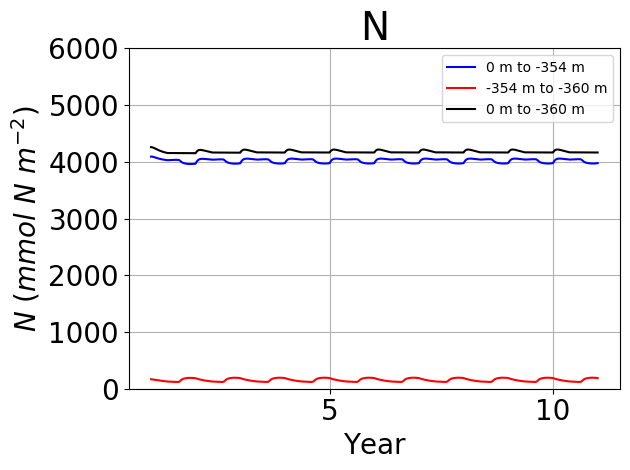

In [17]:
plt.figure(figsize=(6.4,4.8))
plt.plot(array1d_iT_iTforplot,array1d_iT_N0to354,  color='blue', linestyle='-',
         label='0 m to -354 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_N354to360,color='red',  linestyle='-',
         label='-354 m to -360 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_N0to360,  color='black',linestyle='-',
         label='0 m to -360 m')
# plt.plot(array1d_iT_iTforplot,array1d_iT_N0to360,  color='black',linestyle='-',
#          label='0 m to -41 m')
plt.legend(loc='lower right')
plt.title('N')
plt.xlabel('Year')
plt.ylim(0,6000)
plt.ylabel('$N\ (mmol\ N\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.n.vintN.png')

## Annual drift of $NO_3$

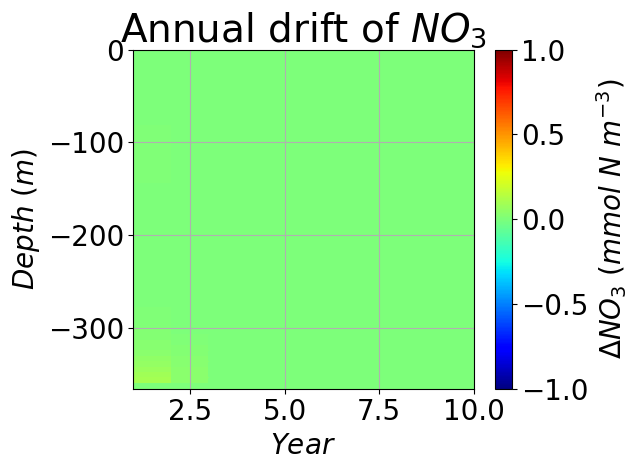

In [18]:
plt.figure(figsize=(6.4,4.8))
plt.pcolormesh(array1d_iyr_yr, RF,
               array2d_idepth_iyr2tolast_deltaNO3,
               cmap='jet',
               vmin=-1,
               vmax=1
              )
plt.title('Annual drift of $NO_3$')
plt.xlabel('$Year$')
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$\Delta NO_3\ (mmol\ N\ m^{-3})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.n.deltaNO3.png')